# Exploratory data analysis across cohorts

## Prerequesits

In [5]:
import matplotlib as plt
import numpy as np 
import pandas as pd
from sksurv.nonparametric import kaplan_meier_estimator
import os
import sys

# Setup paths
PROJECT_ROOT = os.path.dirname(os.getcwd())
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
    
import pandas as pd
import numpy as np
from pathlib import Path
import logging
from preprocessing.data_loader import DataLoader
from preprocessing.data_container import DataContainer
from sklearn.preprocessing import OneHotEncoder
from models.modelling_process import ModellingProcess


# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

In [6]:
dl = DataLoader(PROJECT_ROOT)

In [23]:
merged_pdata_original = dl.merged_pdata_original['merged_original_pData.csv']

## Cohort overview
### General statistics per cohort

In [29]:
cols = []
cohorts_pData_list = []
cohorts_exprs_list = []
cohorts_summary_list = []
df_null = pd.DataFrame()

for c, pData in dl.pdata_original.items(): 
    counts_bcr = pData['BCR_STATUS'].value_counts()
    null_vals = pData.isnull().sum().to_frame().T
    df_null = pd.concat([df_null, null_vals])
    summary = {
        'cohort' : c,
        'ratio_BCR_01': counts_bcr[1].item()/counts_bcr[0].item(), 
        'BCR_0' : counts_bcr[0].item(), 
        'BCR_1' : counts_bcr[1].item(), 
        'MONTH_BCR_0_max' : np.max(pData[pData['BCR_STATUS'] == 0]['MONTH_TO_BCR']).item(),
        'MONTH_BCR_0_min' : np.min(pData[pData['BCR_STATUS'] == 0]['MONTH_TO_BCR']).item(),
        'MONTH_BCR_1_max' : np.max(pData[pData['BCR_STATUS'] == 1]['MONTH_TO_BCR']).item(),
        'MONTH_BCR_1_min' : np.min(pData[pData['BCR_STATUS'] == 1]['MONTH_TO_BCR']).item(),
        'MONTH_BCR_mean' : np.mean(pData['MONTH_TO_BCR']),
        'MONTH_BCR_0' : np.mean(pData[pData['BCR_STATUS'] == 0]['MONTH_TO_BCR']).item(), 
        'MONTH_BCR_1' : np.mean(pData[pData['BCR_STATUS'] == 1]['MONTH_TO_BCR']).item(), 
        'gleason_mean' : np.mean(pData['GLEASON_SCORE']),
        'tissue' : pData['TISSUE'].iloc[0]
        #'age_mean' : np.mean(pData['AGE']).item()
    }
    cohorts_pData_list.append(pData)
    cohorts_summary_list.append(summary)

cohorts_summary_df = pd.DataFrame(cohorts_summary_list)
cohorts_summary_df

,cohort,ratio_BCR_01,BCR_0,BCR_1,MONTH_BCR_0_max,MONTH_BCR_0_min,MONTH_BCR_1_max,MONTH_BCR_1_min,MONTH_BCR_mean,MONTH_BCR_0,MONTH_BCR_1,gleason_mean,tissue
0,Atlanta_2014_Long.csv,0.960784,51,49,171.090,2.301,154.225,0.000,53.439900,82.097843,23.612245,7.060000,FFPE
1,Belfast_2018_Jain.csv,0.291667,192,56,117.000,11.000,106.000,10.000,78.266129,83.911458,58.910714,7.487903,FFPE
2,CamCap_2016_Ross_Adams.csv,0.204301,93,19,66.805,0.953,57.370,0.756,30.870902,33.500624,17.999105,6.937500,Fresh_frozen
3,CancerMap_2017_Luca.csv,0.371134,97,36,123.000,3.000,66.000,1.000,50.714286,60.381443,24.666667,6.857143,Fresh_frozen
4,CPC_GENE_2017_Fraser.csv,0.280702,57,16,154.448,46.883,90.086,1.643,74.192890,86.633070,29.874750,6.780822,Fresh_frozen
5,CPGEA_2020_Li.csv,0.411765,85,35,73.000,14.000,73.000,0.000,27.129167,33.094118,12.642857,7.666667,Snap_frozen
6,DKFZ_2018_Gerhauser.csv,0.281250,64,18,76.000,1.100,37.100,0.500,33.051220,39.784375,9.111111,7.109756,Fresh_frozen
7,MSKCC_2010_Taylor.csv,0.259615,104,27,149.190,1.870,92.980,1.380,48.189313,54.067500,25.547407,6.853846,Fresh_frozen
8,Stockholm_2016_Ross_Adams.csv,0.957447,47,45,103.430,1.808,98.268,0.362,49.887337,75.180957,23.469556,7.044444,Fresh_frozen


### Vizualization of descriptive stats

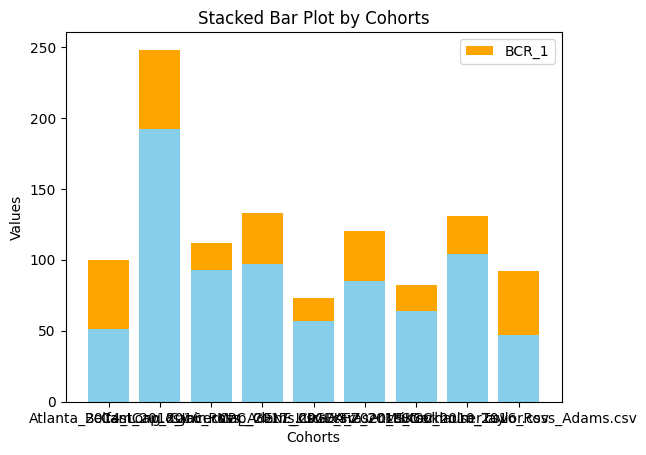

In [49]:
import matplotlib.pyplot as plt

# Stacked Barplot for BCR ratios across cohorts
fig, ax = plt.subplots()
colors = {'BCR_0': 'skyblue', 'BCR_1': 'orange'}

for cohort in cohorts_summary_list:
    ax.bar(cohort['cohort'], cohort['BCR_0'], color=colors['BCR_0'], label='BCR_0' if cohort['cohort'] == 'Cohort 1' else None)
    ax.bar(cohort['cohort'], cohort['BCR_1'], bottom=cohort['BCR_0'], color=colors['BCR_1'], 
           label='BCR_1' if cohort['cohort'] == 'Atlanta_2014_Long.csv' else None)

# Adding labels and title
ax.set_xlabel('Cohorts')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Plot by Cohorts')

handles, labels = ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())
ax.legend([h for _, h in unique_handles_labels], [l for l, _ in unique_handles_labels])


# Display the plot
plt.show()


c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\lifelines\plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\lifelines\plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\lifelines\plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\lifelines\plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\lifelines\plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-

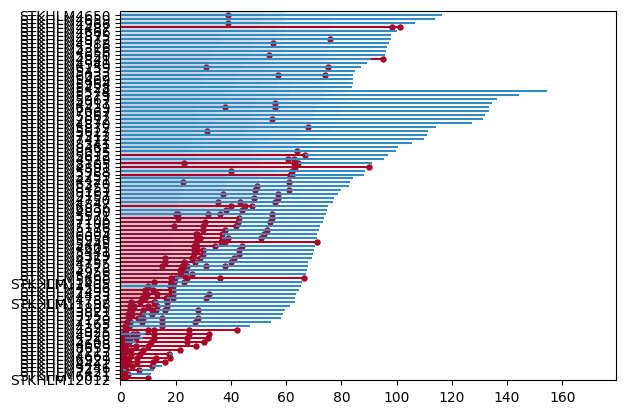

In [50]:
# lifetimes across all cohorts

from lifelines.plotting import plot_lifetimes

# Assuming dl.pdata_original is your data dictionary
fig, axes = plt.subplots(nrows=len(dl.pdata_original), ncols=1, figsize=(10, 5 * len(dl.pdata_original)))

for ax, (c, pData) in zip(axes, dl.pdata_original.items()):
    plot_lifetimes(pData['MONTH_TO_BCR'], event_observed=pData['BCR_STATUS'], ax=ax)
    ax.set_title(f"Lifetimes for Cohort {c}", fontsize=12)

plt.tight_layout()
plt.show()

In [56]:
dl.exprs_data['Atlanta_2014_Long.csv'].ENSG00000000005.describe()

count    1.000000e+02
mean     1.565414e-16
std      1.000000e+00
min     -6.227886e-01
25%     -6.227886e-01
50%     -6.227886e-01
75%      7.241074e-01
max      3.311972e+00
Name: ENSG00000000005, dtype: float64

### Kaplan Meier estimate per cohort

In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

# Create a plot
plt.figure(figsize=(10, 6))

# Fit and plot Kaplan-Meier curves for each cohort
for c, pData in dl.pdata_original.items():
    kmf.fit(durations=pData['Time'], event_observed=pData['Event'], label=c)
    kmf.plot_survival_function()

# Add labels and title
plt.title('Kaplan-Meier Survival Estimates by Cohort')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Cohorts')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()